In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (12, 9)        # small images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

im_file = '/scratch/nikolai/train2014/COCO_train2014_000000057870.jpg'
feat_file = '/scratch/nikolai/frcnn_train2014/57870.npz'
data_path = '../bottom-up-attention/data/genome/1600-400-20'

# Load classes
classes = ['__background__']
with open(os.path.join(data_path, 'objects_vocab.txt')) as f:
    for object in f.readlines():
        classes.append(object.split(',')[0].lower().strip())

# Load attributes
attributes = ['__no_attribute__']
with open(os.path.join(data_path, 'attributes_vocab.txt')) as f:
    for att in f.readlines():
        attributes.append(att.split(',')[0].lower().strip())

boxes=36


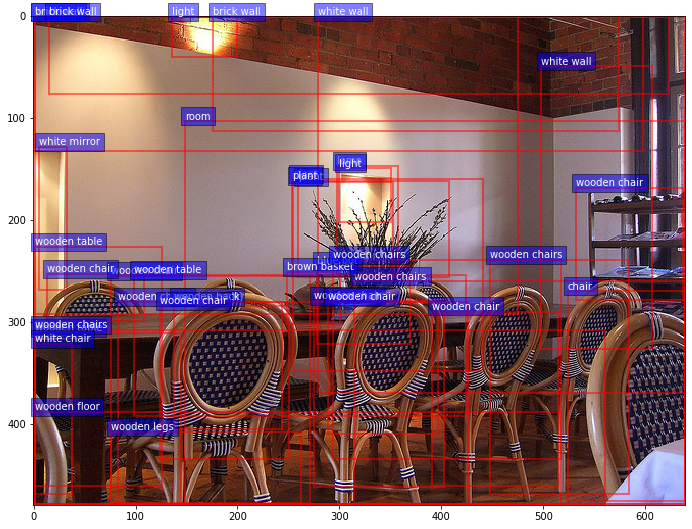

In [4]:
###########################
# Similar to get_detections_from_im
conf_thresh=0.4
min_boxes=36
max_boxes=36
keep_boxes=36

attr_thresh = 0.1

im = cv2.imread(im_file)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

out = np.load(feat_file)

image_id = out['image_id']
image_h = out['image_h']
image_w = out['image_w']
boxes = out['bbox']
num_boxes = out['num_bbox']
objects = out['objects']
attr = out['attr']
attr_conf = out['attr_conf']

for i in range(keep_boxes):
    bbox = boxes[i]
    if bbox[0] == 0:
        bbox[0] = 1
    if bbox[1] == 0:
        bbox[1] = 1
    cls = classes[objects[i]+1]
    if attr_conf[i] > attr_thresh:
        cls = attributes[attr[i]+1] + " " + cls
        
    plt.gca().add_patch(
        plt.Rectangle((bbox[0], bbox[1]),
                      bbox[2] - bbox[0],
                      bbox[3] - bbox[1], fill=False,
                      edgecolor='red', linewidth=2, alpha=0.5)
            )
    plt.gca().text(bbox[0], bbox[1] - 2,
                '%s' % (cls),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=10, color='white')
    
print('boxes=%d' % keep_boxes)